In [3]:
from mido import MidiFile

In [10]:
mid = MidiFile("S00.mid", clip=True)
for msg in mid.tracks[0]:
    print(msg)

MetaMessage('set_tempo', tempo=722892, time=0)
MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0)
MetaMessage('key_signature', key='E', time=0)
MetaMessage('end_of_track', time=1)


In [4]:
song = "/Users/dylanhashem/Desktop/Mus-Comp/MusComp Sample Datasets/slakh2100/test/Track01928/MIDI/S01.mid"

In [5]:
%cd ~/Desktop/Mus-Comp/Python_Midi_Analysis

/Users/dylanhashem/Desktop/Mus-Comp/Python_Midi_Analysis


In [6]:
from MidiEventDecoder import MidiEventDecoder
from TrackData import TrackData
from TrackData import TempoChanges
from MidiEvents import *
from MidiData import MidiData
import os

In [7]:
midiData = MidiData(song)
for track in midiData.tracks:
    print(track)

In [8]:
for track in midiData.tracks:
    for note in track.notes:
        print("Instrument:",track.name, " Note:",(str(note).split(' ', 1)[1]), " Pitch:", note.pitch," Duration: ", 
              (note.length()/1000), "s ", "velocity: ",note.velocity, '\n')

Instrument: Solo Guitar  Note: G#3 107.00s to 107.35s Channel: 0  Pitch: 56  Duration:  0.3576809375000012 s  velocity:  107 

Instrument: Solo Guitar  Note: A3 107.35s to 107.64s Channel: 0  Pitch: 57  Duration:  0.28990981250000186 s  velocity:  107 

Instrument: Solo Guitar  Note: B3 107.70s to 108.00s Channel: 0  Pitch: 59  Duration:  0.2974399374999484 s  velocity:  107 

Instrument: Solo Guitar  Note: E4 108.06s to 108.60s Channel: 0  Pitch: 64  Duration:  0.5384039374999556 s  velocity:  107 

Instrument: Solo Guitar  Note: C#4 108.40s to 108.41s Channel: 0  Pitch: 61  Duration:  0.015060249999994994 s  velocity:  107 

Instrument: Solo Guitar  Note: C#4 108.41s to 109.13s Channel: 0  Pitch: 61  Duration:  0.7153618750000024 s  velocity:  107 

Instrument: Solo Guitar  Note: B3 109.13s to 109.72s Channel: 0  Pitch: 59  Duration:  0.5911148125000036 s  velocity:  107 

Instrument: Solo Guitar  Note: F#3 109.86s to 110.46s Channel: 0  Pitch: 54  Duration:  0.6024100000000034 s  ve

In [9]:
def parseDirectory(directory):
    songs= []
    midis = []
    instruments = []
    notes = []
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            songs.append(f)
    for song in songs:
        print(song)
        midiData = MidiData(song)
        midis.append(midiData)
        for track in midiData.tracks:
            if(track.name != 'Track0'):
                instruments.append(track.name)
            for note in track.notes:
                notes.append(("Instrument:",track.name, " Note:",(str(note).split(' ', 1)[1]), " Pitch:", note.pitch," Duration: ", 
                  (note.length()/1000), "s ", "velocity: ",note.velocity, '\n'))
    return notes

In [10]:
path = "/Users/dylanhashem/Desktop/Mus-Comp/MusComp Sample Datasets/slakh2100/train/Track00889/MIDI"
parsedData = parseDirectory(path)
print(parsedData)

/Users/dylanhashem/Desktop/Mus-Comp/MusComp Sample Datasets/slakh2100/train/Track00889/MIDI/S04.mid
/Users/dylanhashem/Desktop/Mus-Comp/MusComp Sample Datasets/slakh2100/train/Track00889/MIDI/S03.mid
/Users/dylanhashem/Desktop/Mus-Comp/MusComp Sample Datasets/slakh2100/train/Track00889/MIDI/S02.mid
/Users/dylanhashem/Desktop/Mus-Comp/MusComp Sample Datasets/slakh2100/train/Track00889/MIDI/S00.mid
/Users/dylanhashem/Desktop/Mus-Comp/MusComp Sample Datasets/slakh2100/train/Track00889/MIDI/S01.mid
[('Instrument:', 'Rhodes Piano        ', ' Note:', 'G3 3.58s to 5.21s Channel: 0', ' Pitch:', 55, ' Duration: ', 1.623133625, 's ', 'velocity: ', 82, '\n'), ('Instrument:', 'Rhodes Piano        ', ' Note:', 'B3 3.58s to 5.21s Channel: 0', ' Pitch:', 59, ' Duration: ', 1.623133625, 's ', 'velocity: ', 82, '\n'), ('Instrument:', 'Rhodes Piano        ', ' Note:', 'E4 3.58s to 5.21s Channel: 0', ' Pitch:', 64, ' Duration: ', 1.623133625, 's ', 'velocity: ', 82, '\n'), ('Instrument:', 'Rhodes Piano  

In [38]:
print(parsedData[0][7])

1.623133625


In [41]:
from midi2audio import FluidSynth
from midiutil.MidiFile import MIDIFile
def createMidi():
    mf = MIDIFile(1)
    mf.addProgramChange(0, 0, parsedData[0][7], 24)
    mf.addNote(0, 0, parsedData[0][5], 0, parsedData[0][7], parsedData[0][10])

    with open("output.mid", 'wb') as outf:
        mf.writeFile(outf)

In [43]:
FluidSynth().play_midi('output.mid')
FluidSynth().midi_to_audio('output.mid', 'output.wav')

Parameter '/Users/dylanhashem/.fluidsynth/default_sound_font.sf2' not a SoundFont or MIDI file or error occurred identifying it.


FluidSynth runtime version 2.1.9
Copyright (C) 2000-2021 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

FluidSynth runtime version 2.1.9
Copyright (C) 2000-2021 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

Rendering audio to file 'output.wav'..


Parameter '/Users/dylanhashem/.fluidsynth/default_sound_font.sf2' not a SoundFont or MIDI file or error occurred identifying it.


In [45]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
from pydub.playback import play
import spleeter
import wave
from pathlib import Path

In [46]:
def visualize_audio(wav):
    wav_obj = wave.open(wav, 'rb')
    sample_freq = wav_obj.getframerate()
    n_samples = wav_obj.getnframes()
    t_audio = n_samples/sample_freq
    n_channels = wav_obj.getnchannels
    signal_wave = wav_obj.readframes(n_samples)
    signal_array = np.frombuffer(signal_wave, dtype=np.int16)
    l_channel = signal_array[0::2]
    r_channel = signal_array[1::2]
    times = np.linspace(0, n_samples/sample_freq, num=n_samples)
    plt.figure(figsize=(15,5))
    plt.plot(times, l_channel)
    plt.title('Left Channel')
    plt.ylabel("Signal Value")
    plt.xlabel('Time (s)')
    plt.xlim(0, t_audio)
    plt.show()
    plt.figure(figsize=(15,5))
    plt.specgram(l_channel, Fs=sample_freq, vmin=-20, vmax=50)
    plt.title('Left Channel')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    plt.xlim(0, t_audio)
    plt.colorbar()
    plt.show()

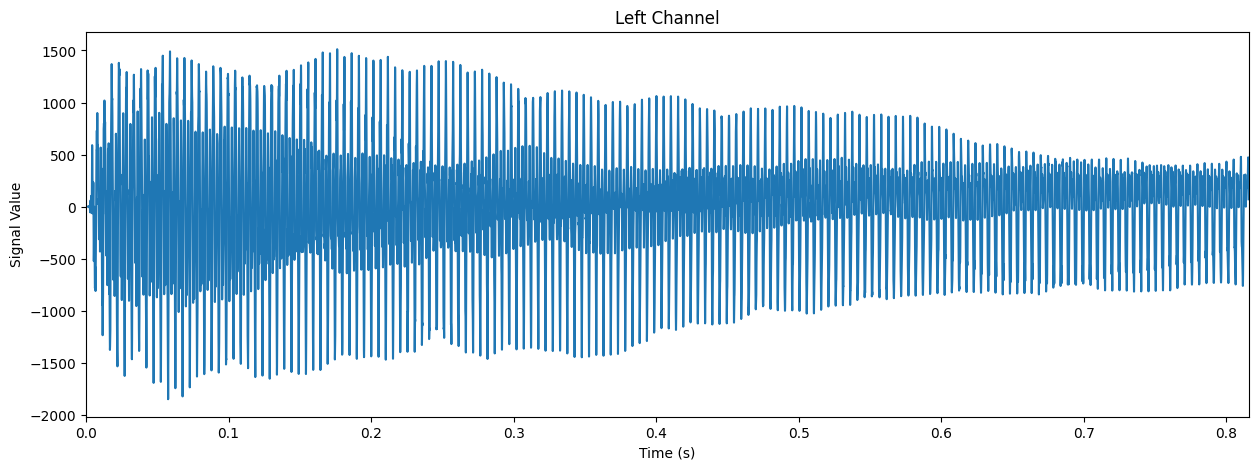

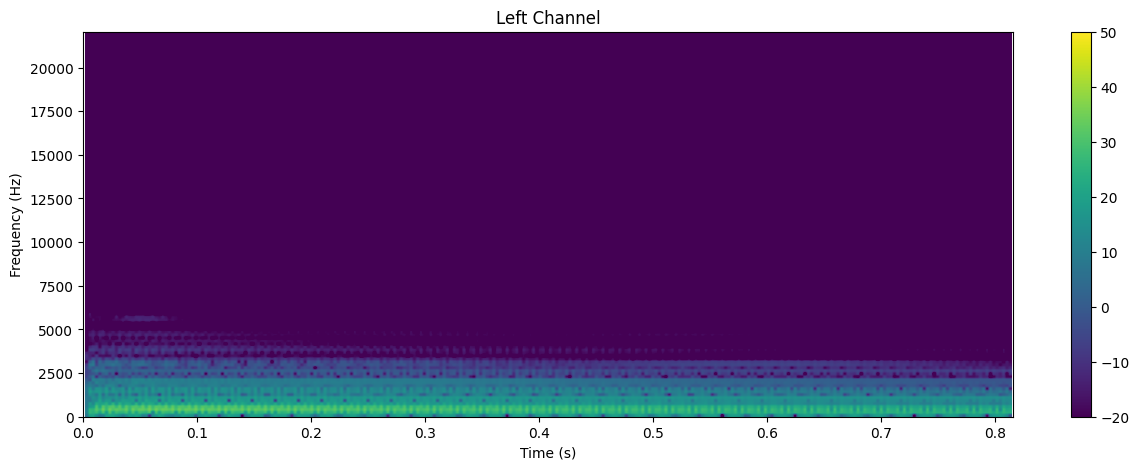

In [47]:
visualize_audio('output.wav')